In [69]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Loading the Data set

In [30]:
# Importing Micro Credit Defaulter Dataset
df=pd.read_csv('Data file.csv')
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [31]:
#checking the datatype of each column 
print(df.dtypes)

print(df.info())

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [32]:
# Checking the shape of data set
df.shape

(209593, 37)

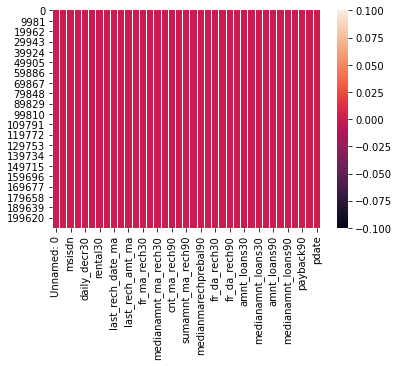

In [33]:
#checking null values using heat map
sns.heatmap(df.isnull())


In [34]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [35]:
df["Year"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.year

df["Month"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.month

df["Day"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.day

In [36]:
df['Year'].value_counts()

2016    209593
Name: Year, dtype: int64

In [37]:
df.drop(['pdate','Unnamed: 0'],axis=1,inplace=True)

In [38]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22


In [39]:
# Checking Unique values of Attributes
for col in df:
    print(col)
    print(df[col].unique())
    print('')

label
[0 1]

msisdn
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']

aon
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]

daily_decr30
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]

daily_decr90
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]

rental30
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]

rental90
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]

last_rech_date_ma
[2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]

last_rech_date_da
[0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]

last_rech_amt_ma
[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  193

# Data Visualisation and Analysis

Text(0.5, 1.0, 'Micro Credit Defaulter - target value - data unbalance\n (Defaulter = 0, Non Defaulter = 1)')

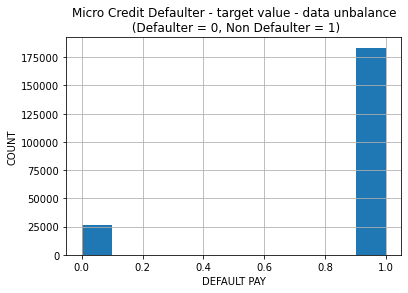

In [40]:
df['label'].hist()
plt.xlabel('DEFAULT PAY')
plt.ylabel('COUNT')
plt.title('Micro Credit Defaulter - target value - data unbalance\n (Defaulter = 0, Non Defaulter = 1)')

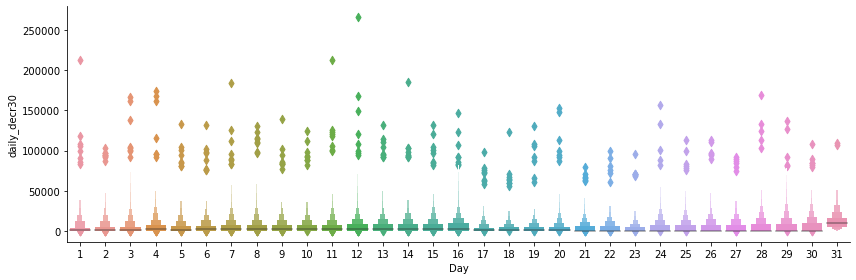

In [41]:
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


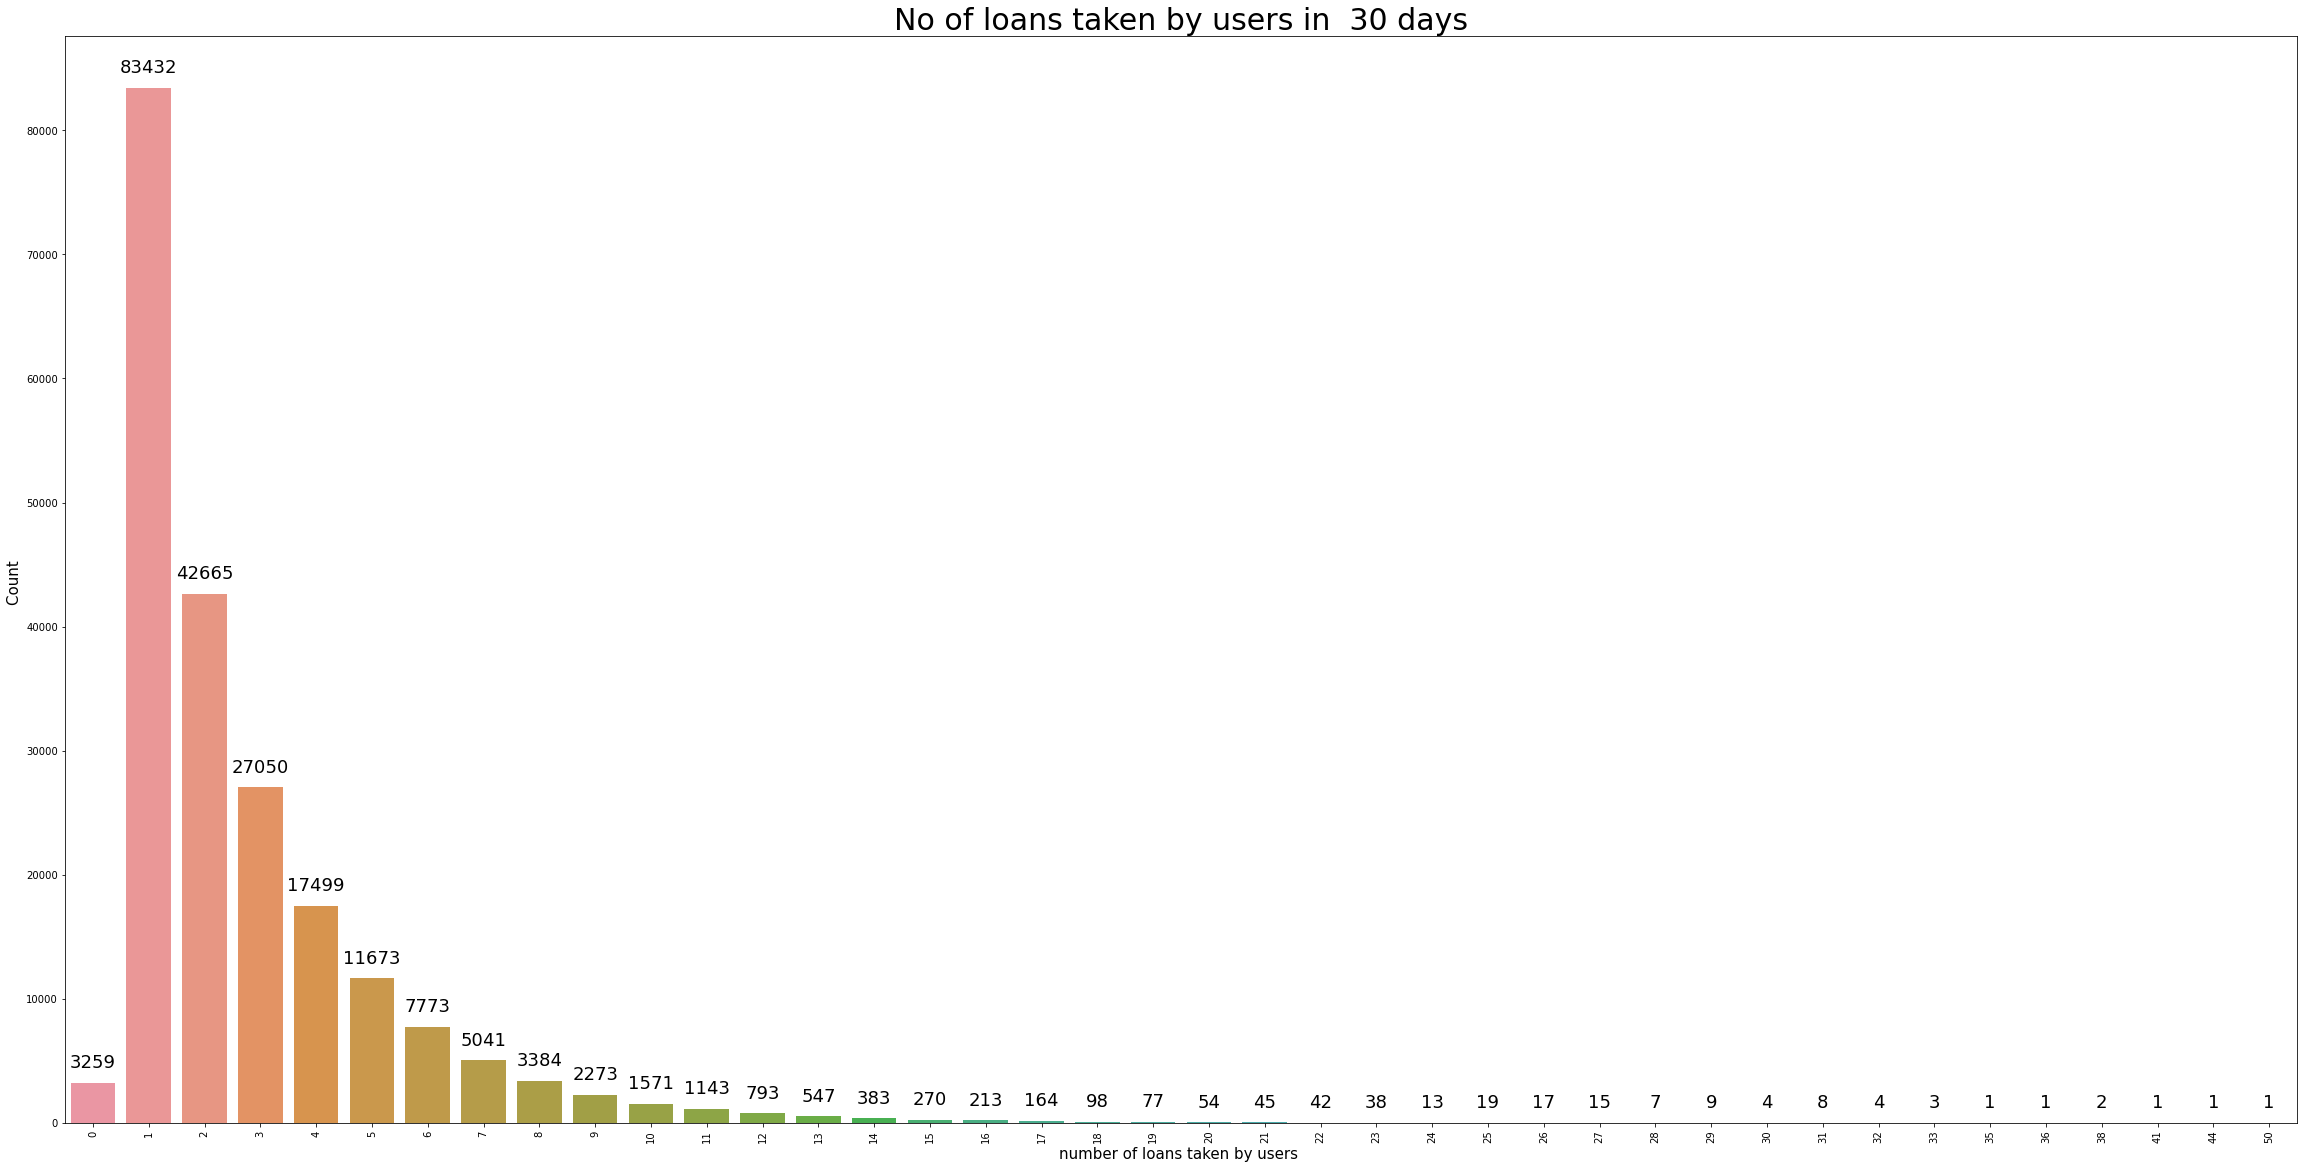

In [42]:
#  Number of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("number of loans taken by users ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  No of loans taken by users in  30 days  " , size=30)
plt.show()

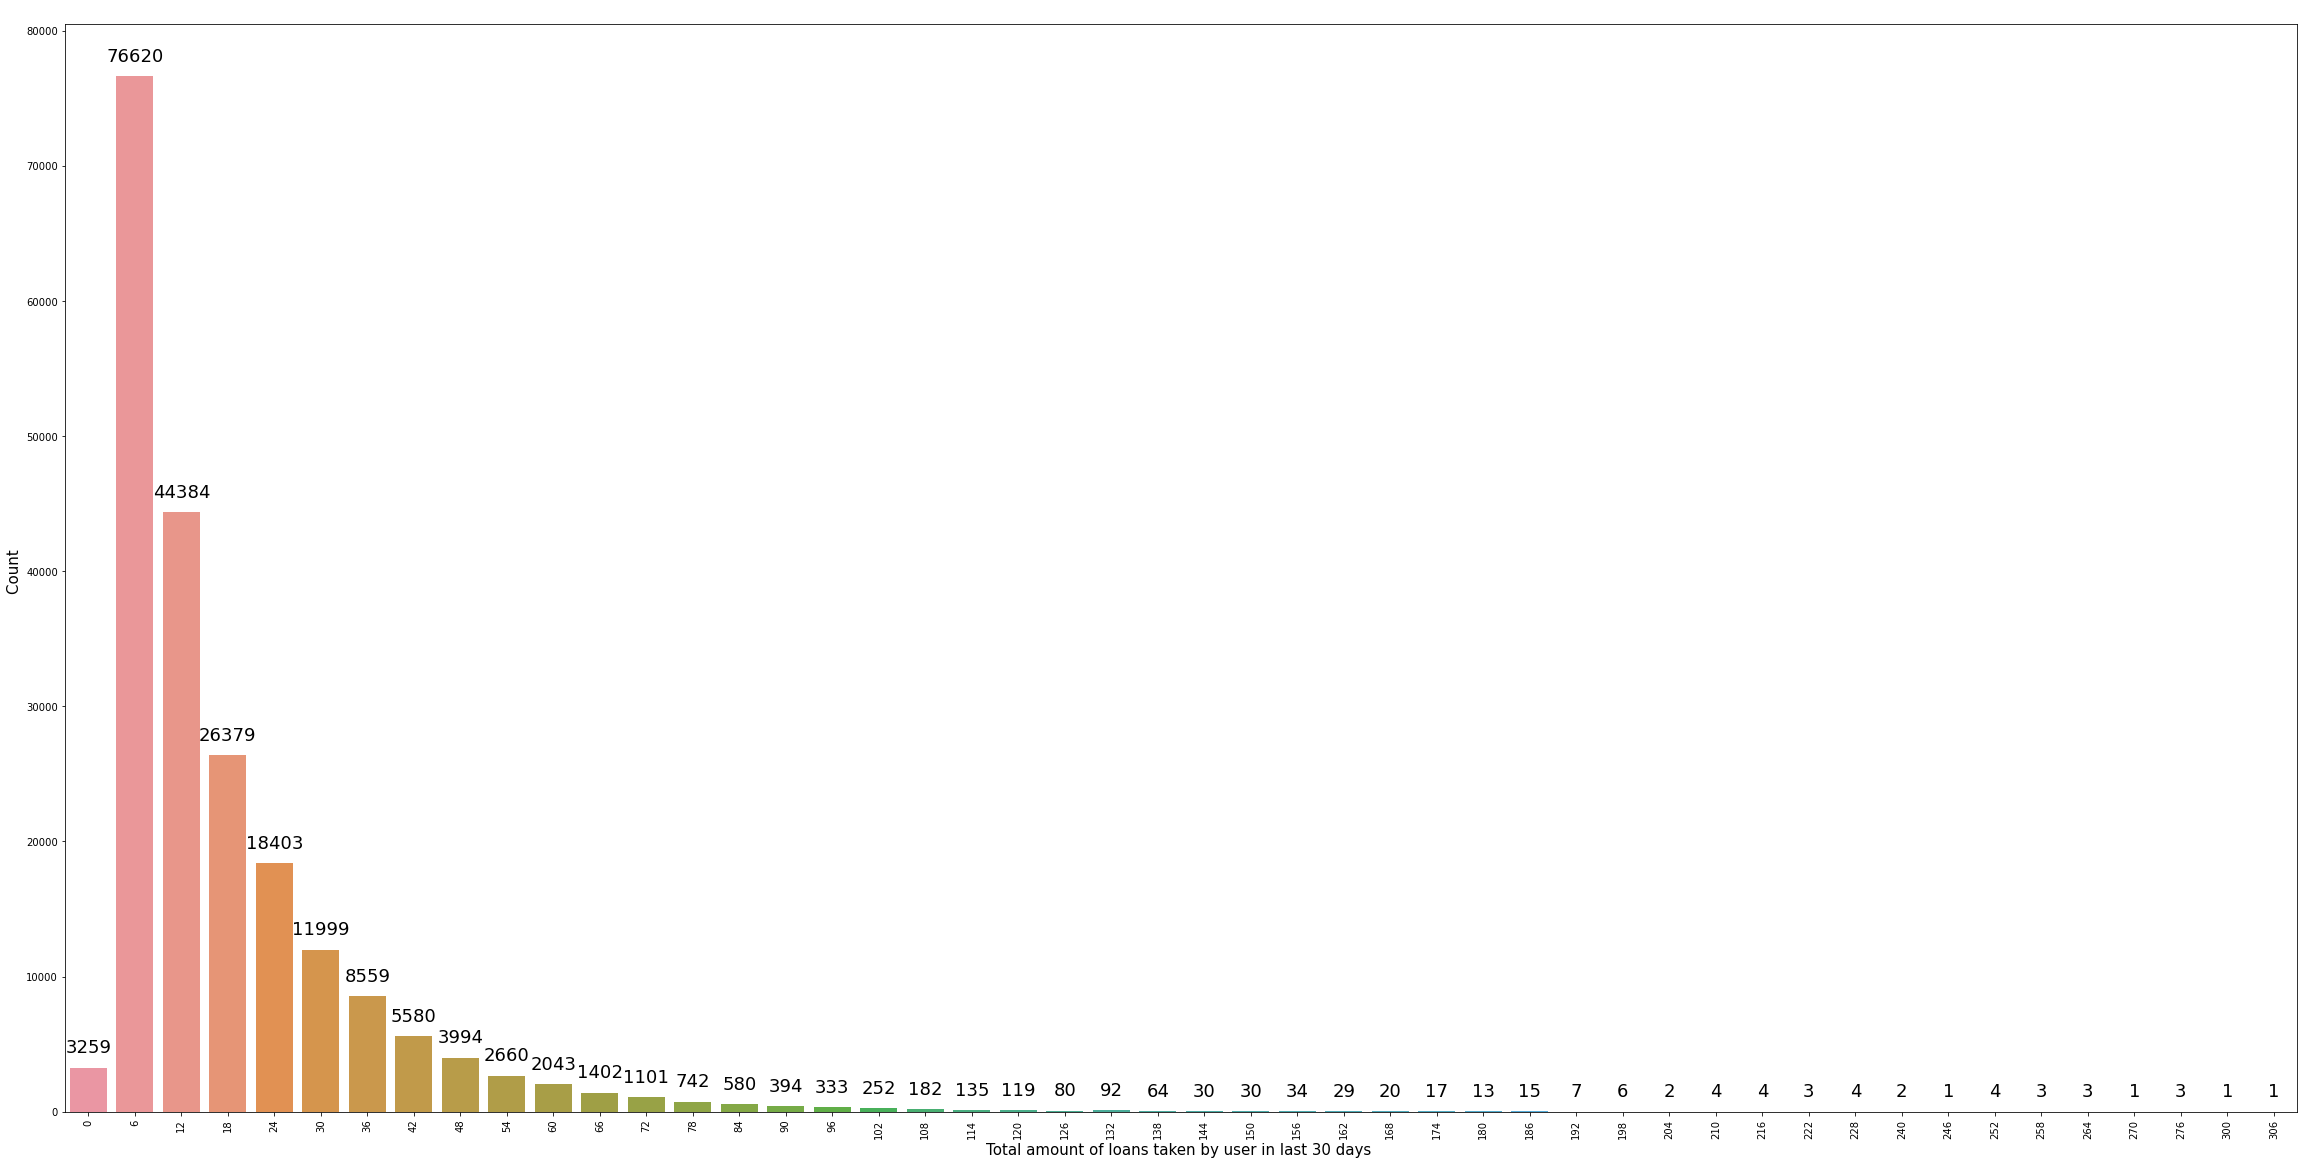

In [43]:
#  Total amount of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "amnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Total amount of loans taken by user in last 30 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

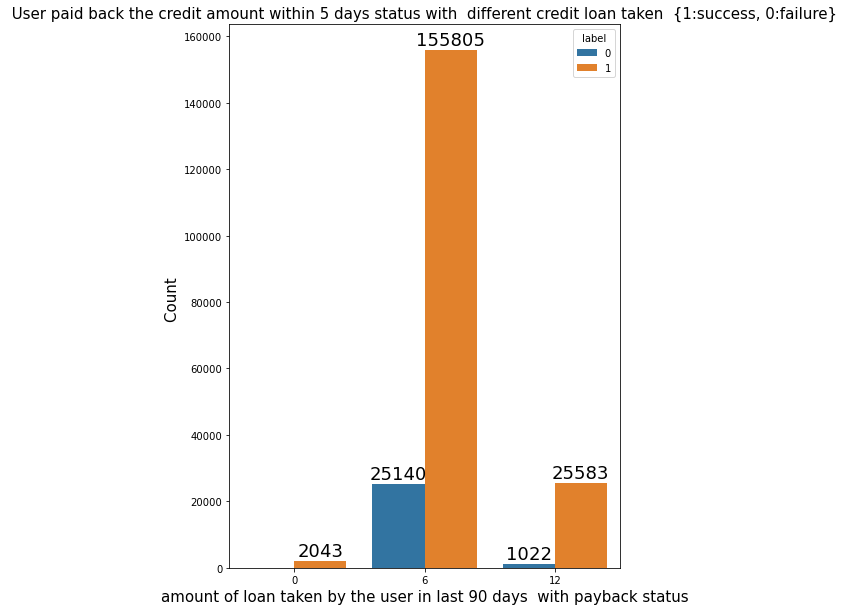

In [44]:
# User paid back the credit amount  within 5 days status with  different credit loan taken.
plt.figure(figsize=(7,10))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("amount of loan taken by the user in last 90 days  with payback status", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" User paid back the credit amount within 5 days status with  different credit loan taken  {1:success, 0:failure} " , size=15)
plt.show()

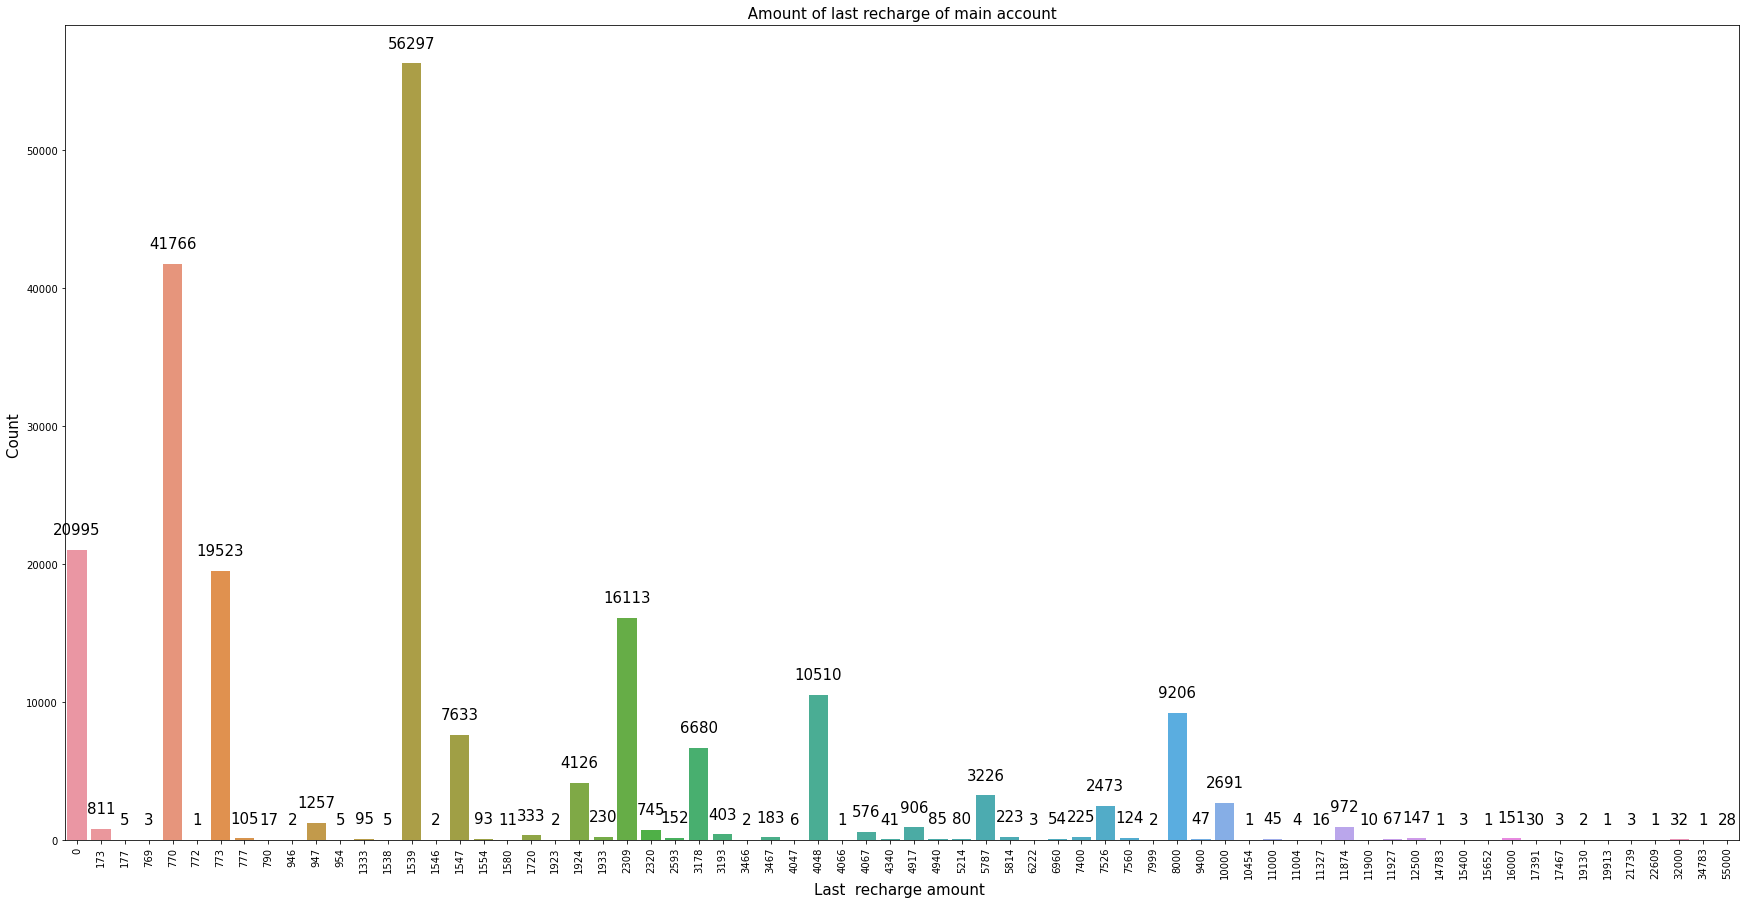

In [45]:
#  Amount of last recharge of main account .
plt.figure(figsize=(30,15))
pd =sns.countplot(x = "last_rech_amt_ma" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Last  recharge amount ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Amount of last recharge of main account " , size=15)
plt.show()

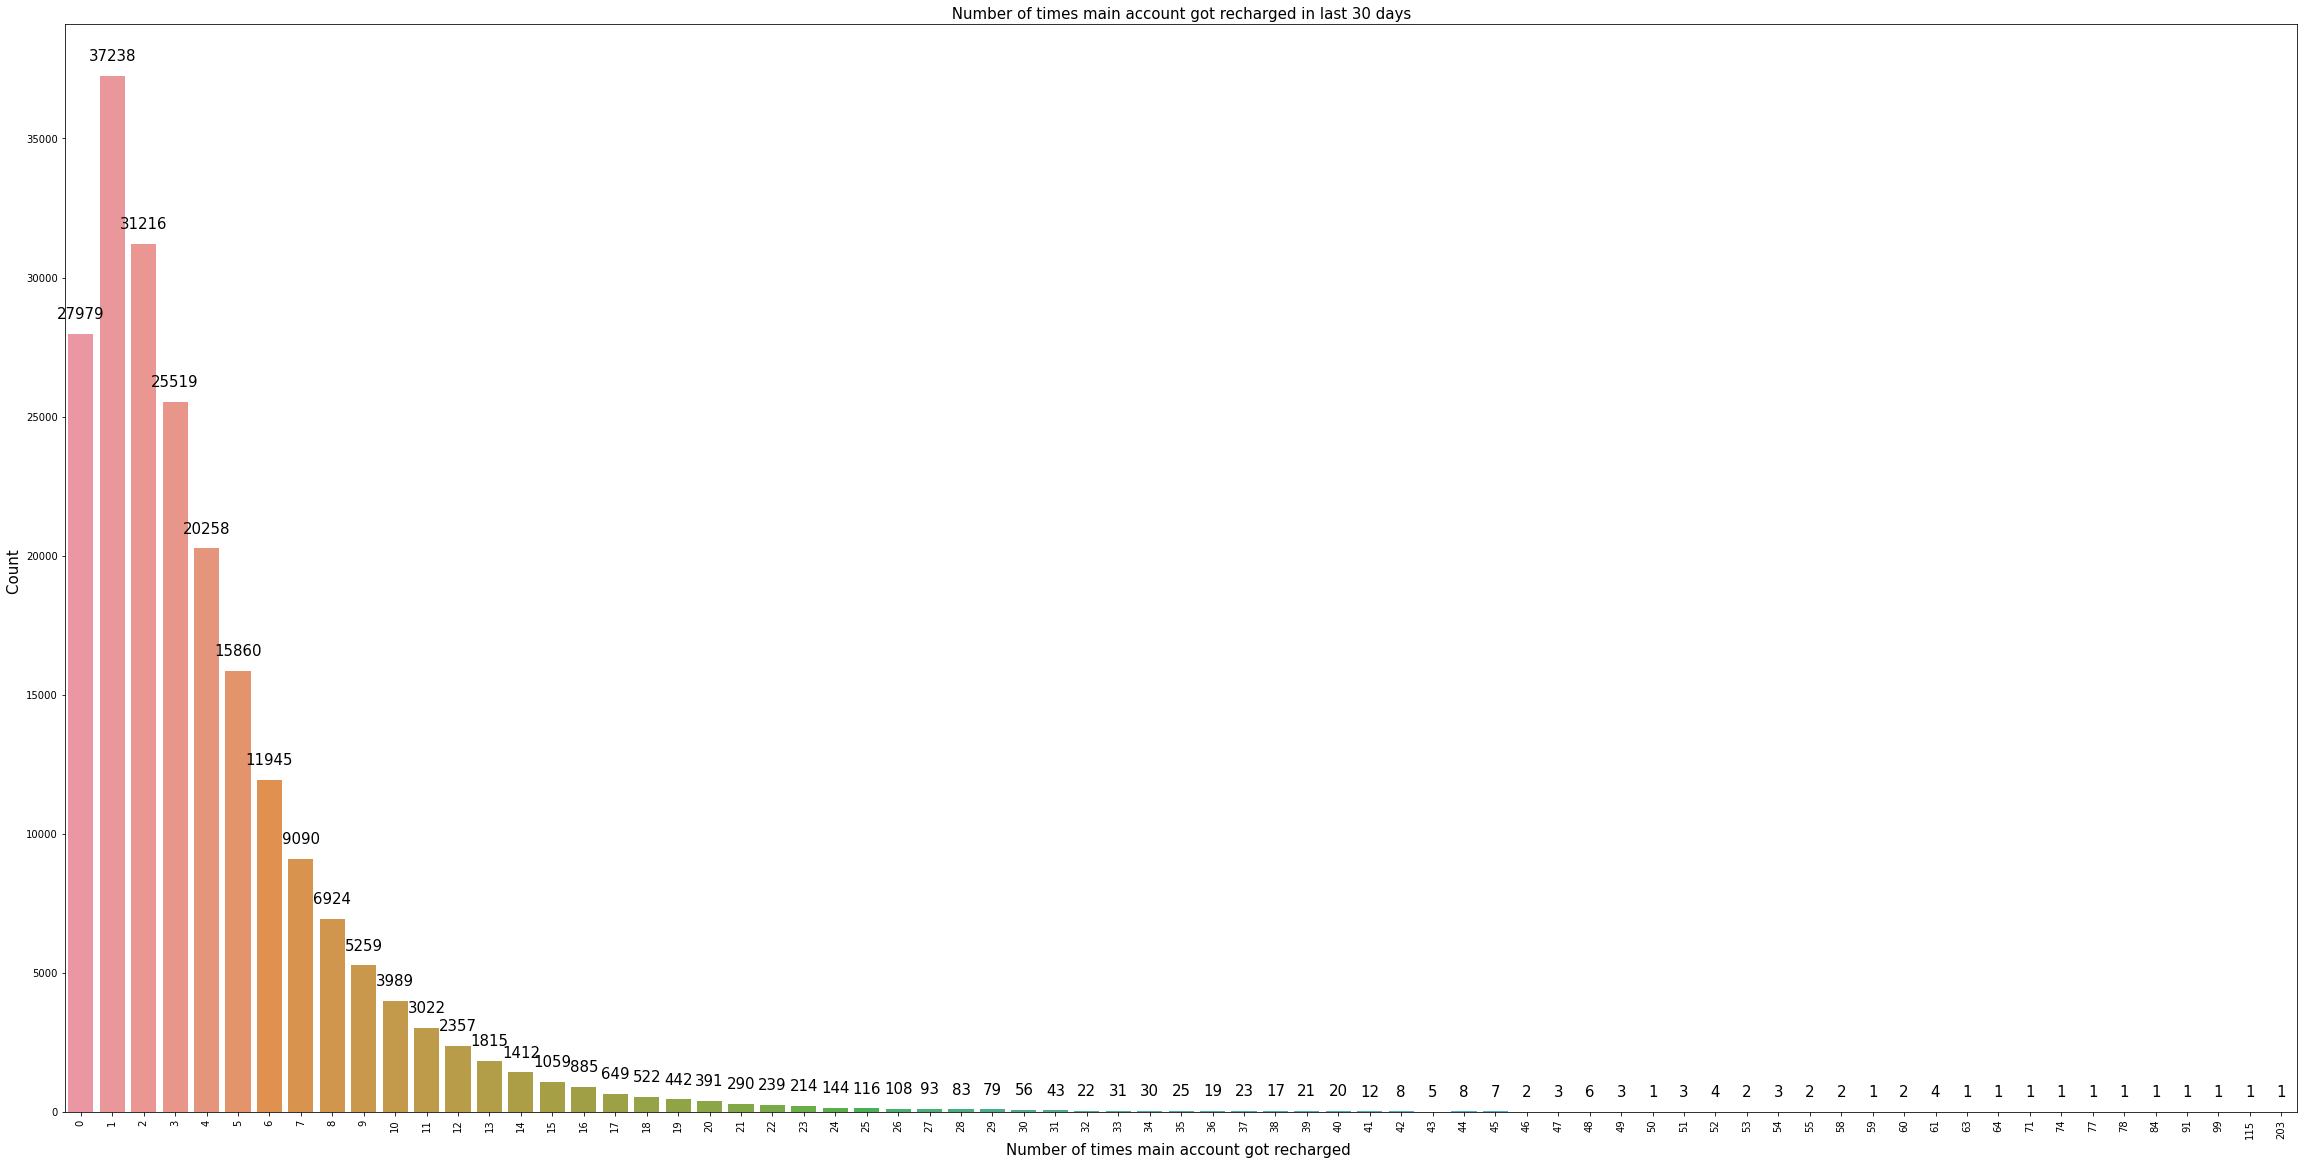

In [46]:
# Number of times main account got recharged in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_ma_rech30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of times main account got recharged ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Number of times main account got recharged in last 30 days " , size=15)
plt.show()

label                      AxesSubplot(0.125,0.749828;0.0824468x0.130172)
aon                     AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
daily_decr30            AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
daily_decr90            AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
rental30                AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
rental90                AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
last_rech_date_ma       AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
last_rech_date_da       AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
last_rech_amt_ma           AxesSubplot(0.125,0.593621;0.0824468x0.130172)
cnt_ma_rech30           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
fr_ma_rech30            AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
medianmarechprebal30    AxesSubplot(0.

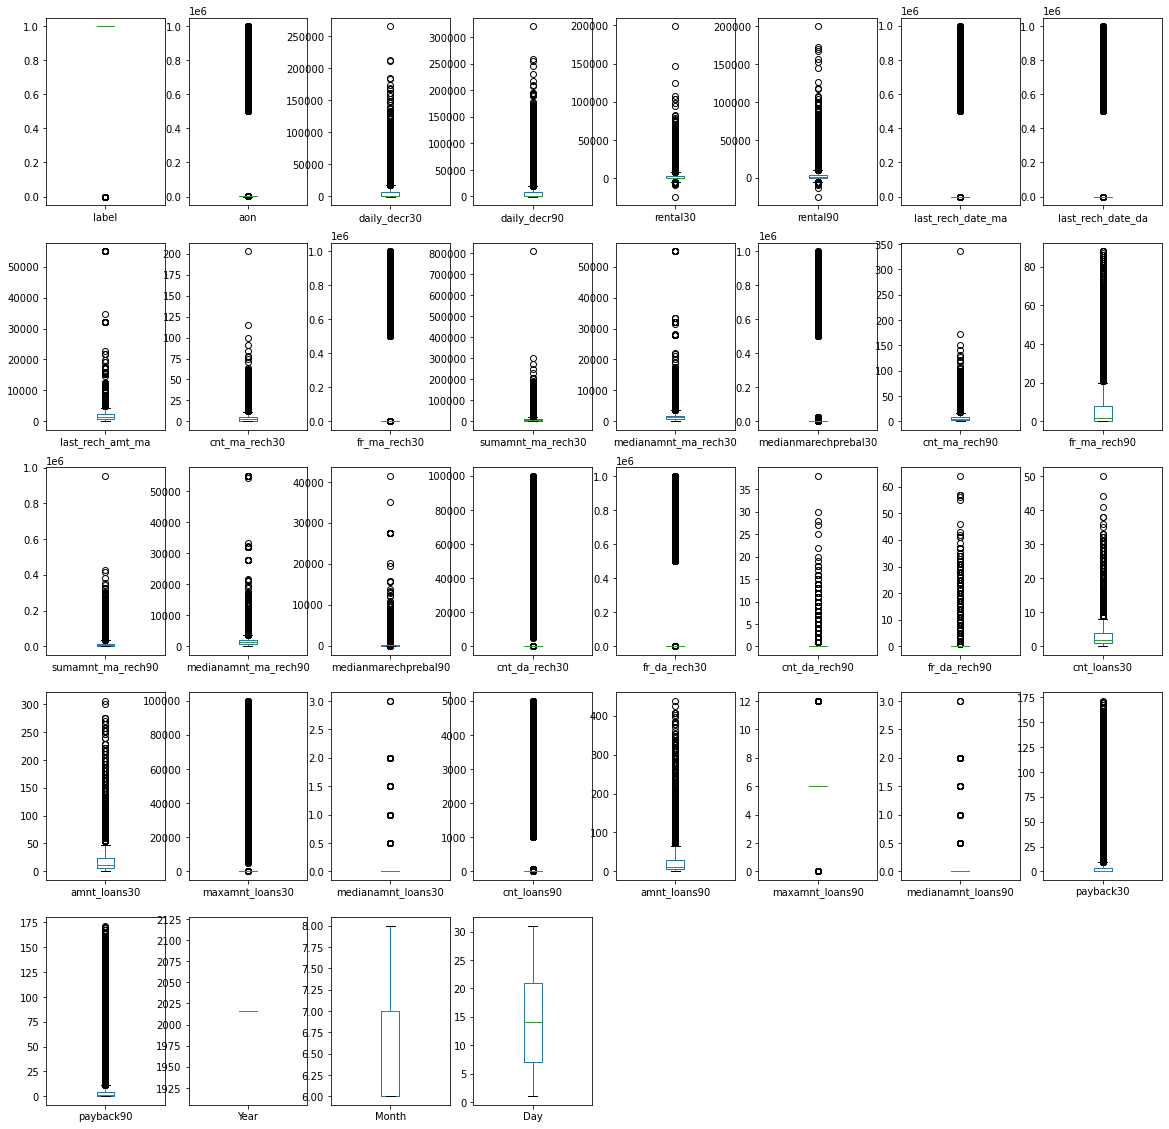

In [47]:
df.plot(kind='box',subplots=True,layout=(5,8),figsize=(20,20))

# Statistical Analysis

In [48]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2016.0,8.000000,31.00000


There are 209593 distinct micro-credit  customers.

The average value for Number of days till last recharge of main account is 3755.84. The standard deviation is unusually large, max value being 998650.37.

The average value for Number of days till last recharge of data account is 3712.20. The standard deviation is unusually large, max value being 999171.80.

The average value for Number of times main account got recharge in last 30 days is 3.97 and the max value of recharge is 203.

The average value for number of times data account got recharge in last 30 days is 262.57. The standard deviation is high , amx value being 99914.44

The average value for number of loans taken by user in last 30 days is 2.75 and std is 2.55 , max value is 50.

<function matplotlib.pyplot.show(*args, **kw)>

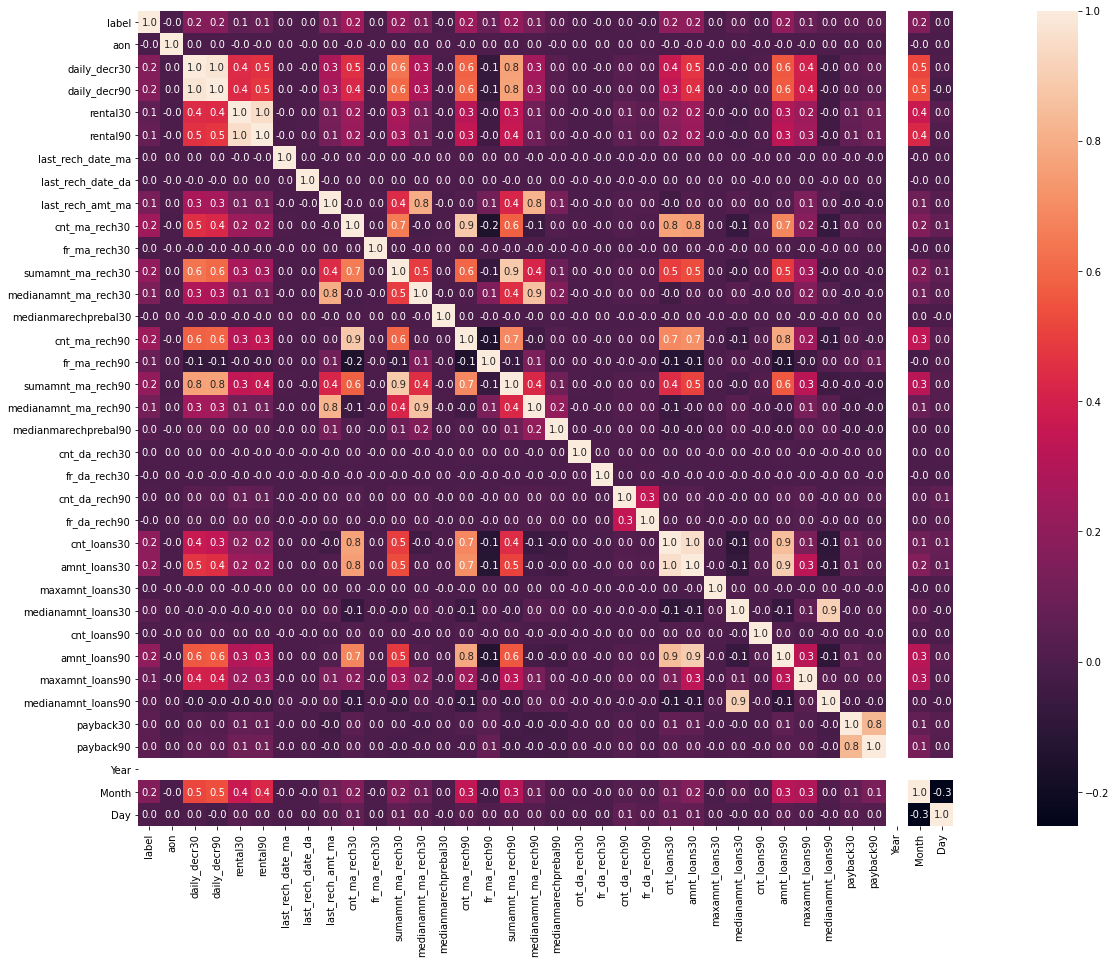

In [49]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,square=True,fmt=".1f")
plt.show

In [50]:
correlation=df.corr()
correlation

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,NaN,0.156148,0.068643


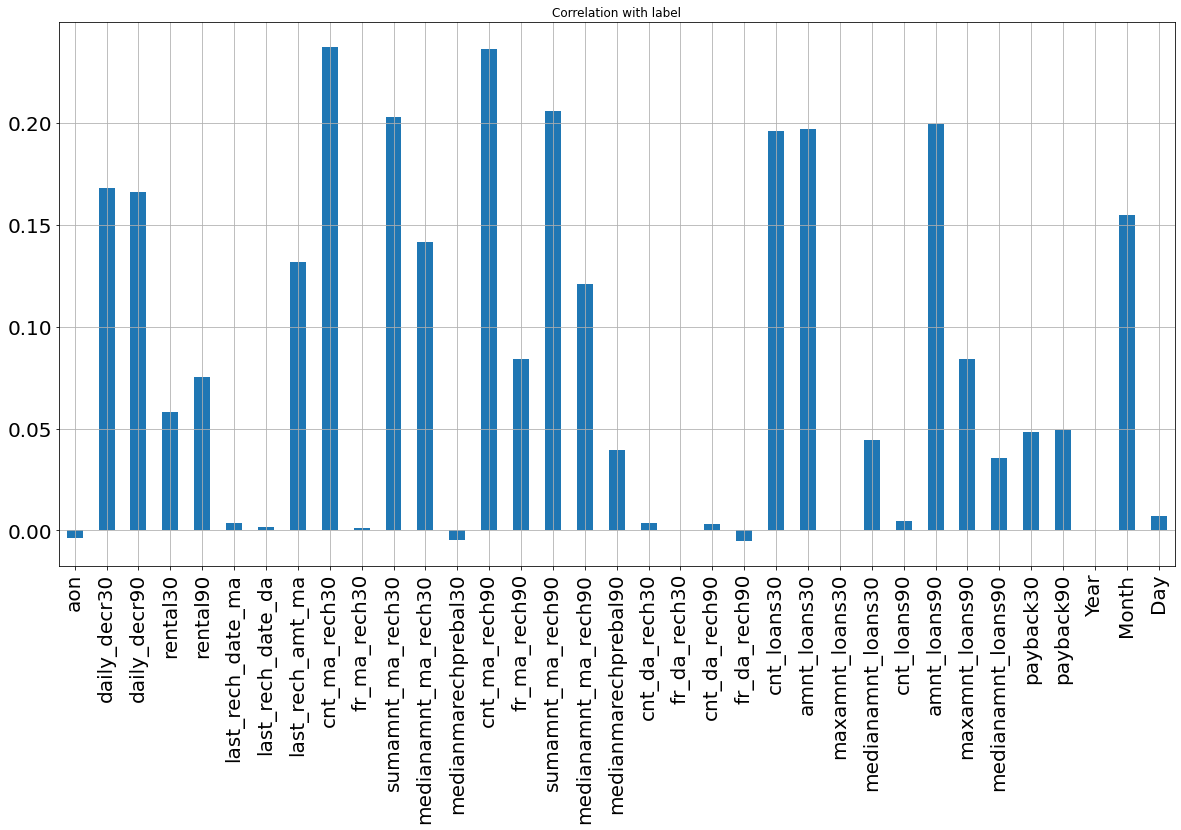

In [51]:
X = df.drop(['label'],axis=1)
X.corrwith(df['label']).plot.bar(figsize = (20, 10), title = "Correlation with label", fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that negatively correlated feature is age on cellular network in days, medianmarechprebal30,  but we cannot blindly remove this feature because according to me it is very important feature for prediction. msisdn, year, pcircle and  Frequency of data account recharged in last 30 days is unimportant and it has no role in prediction so we will remove it later.

In [52]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [53]:
df.drop(['pcircle','Year','msisdn','fr_da_rech30','maxamnt_loans30'],axis=1,inplace=True)

# Removing Outliers

In [54]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("new shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

The shape before removing outliers and skewness (209593, 33)
skewness before removing outliers
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90         

# Spliting Data into Input and Output Variable

In [56]:
x=df1.drop('label',axis=1)
y=df1['label']

In [58]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0,0,2,12,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0,0,3,18,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0,0,4,42,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,1,0,2,18,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [59]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 163026, dtype: int64

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(x,y)

ExtraTreesClassifier()

In [61]:

print(selection.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05865932 0.11359513 0.11445125 0.05708914 0.05557272 0.04090734
 0.00198992 0.02834435 0.03836222 0.02268823 0.03662922 0.02594971
 0.03116649 0.03162234 0.02412374 0.03277798 0.02751454 0.0374299
 0.00118876 0.0022237  0.         0.01597931 0.01791491 0.00177666
 0.01439392 0.01534676 0.00420581 0.00151699 0.01180189 0.01442742
 0.05037766 0.06997265]


# Checking Feature Importance

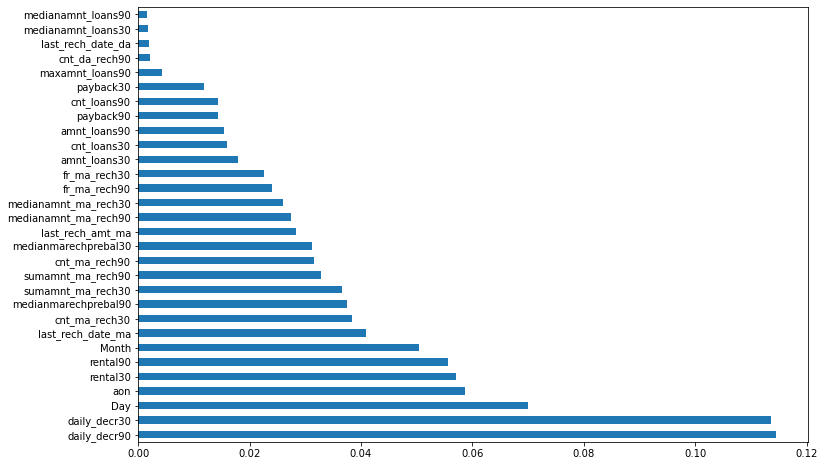

In [72]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()


# Importing Necessary Libraries

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [64]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.8831275047027072 is achieved at 78


The max accuracy score  for LogisticRegression   0.8666475832174695 is achieved at 60


The max accuracy score  for GaussianNB 0.653860309151877 is achieved at 78


The max accuracy score  for KNeighborsClassifier 0.8765232681769853 is achieved at 52


The max accuracy score  for GradientBoostingClassifier 0.9172732477304326 is achieved at 62


The max accuracy score  for AdaBoostClassifier 0.9073362231127832 is achieved at 62


The max accuracy score  for RandomForestClassifier  0.9202584444262697 is achieved at 56




# Finding Best Parameters by Using GridSearchCV

In [66]:
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']  }
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")



#Best parameters for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors" :(5,10,15) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy") ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy") , 'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")



{'penalty': 'l2'}


{'algorithm': 'auto', 'n_neighbors': 15}


{'criterion': 'entropy', 'max_features': 'log2'}


{'criterion': 'entropy', 'max_features': 'log2'}


{'learning_rate': 1, 'n_estimators': 200}


{'learning_rate': 0.1, 'n_estimators': 150}






The model calculation for LogisticRegression(random_state=60) are:
[1 1 1 ... 1 1 1]
Accuracy Score=  0.8642144434448352
The CV Score is 0.8634819026734579

[[  315   203]
 [ 6438 41952]]

              precision    recall  f1-score   support

           0       0.05      0.61      0.09       518
           1       1.00      0.87      0.93     48390

    accuracy                           0.86     48908
   macro avg       0.52      0.74      0.51     48908
weighted avg       0.99      0.86      0.92     48908



F1 Score=  0.9266552542934452

Precision Score=  0.9951844383821611

Recall Score=  0.8669559826410416

roc_auc_score 0.5209151867610494


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for KNeighborsClassifier(n_neighbors=15) are:
[1 1 1 ... 1 0 1]
Accuracy Score=  0.8805716856138055
The CV Score is 0.8804853123493848

[[ 2397  1485]
 [ 4356 40670]]

              precision    recall  f1-score   support

           0       0.35      0.62      0.45      38

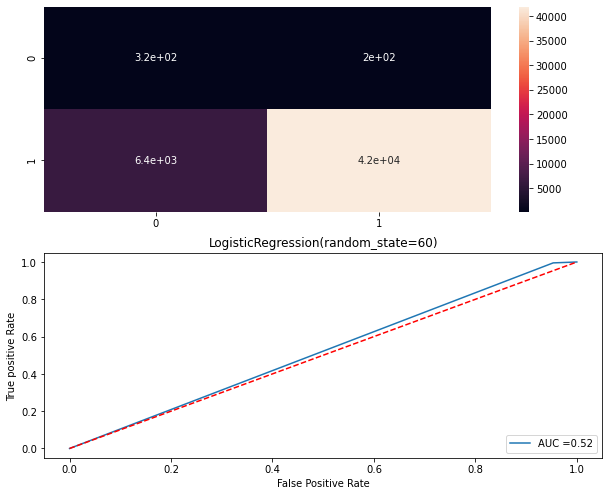

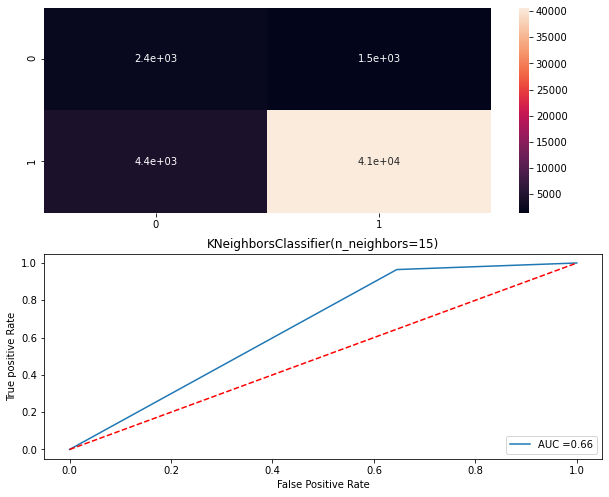

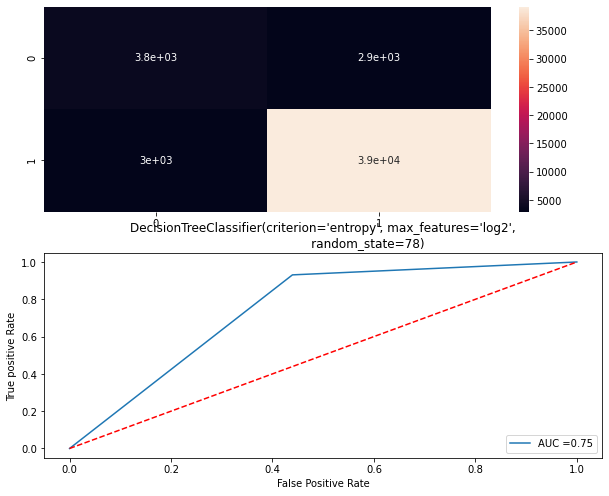

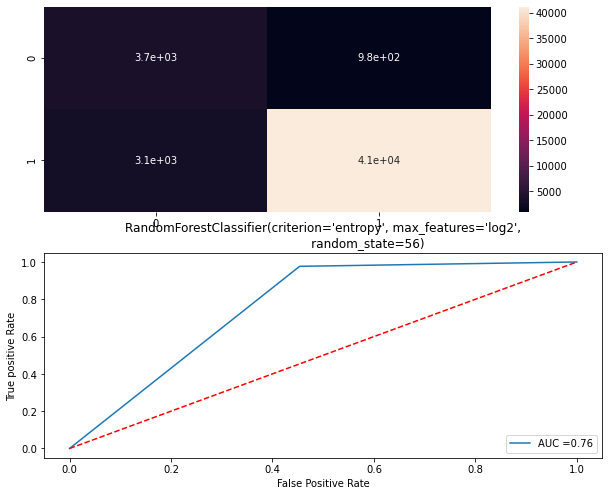

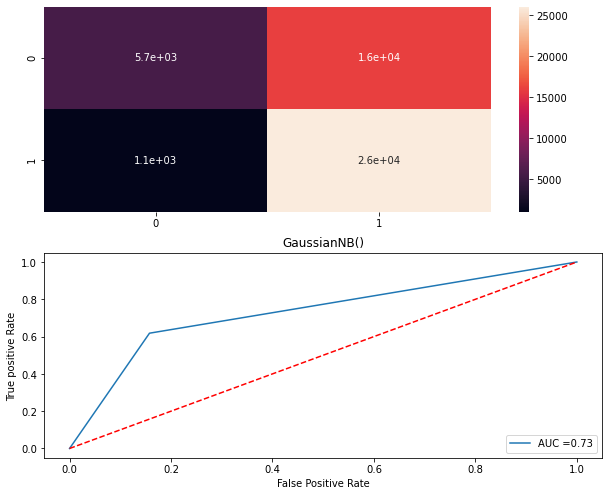

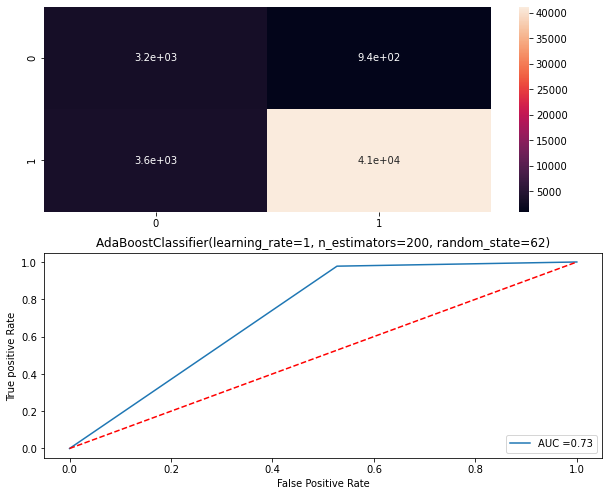

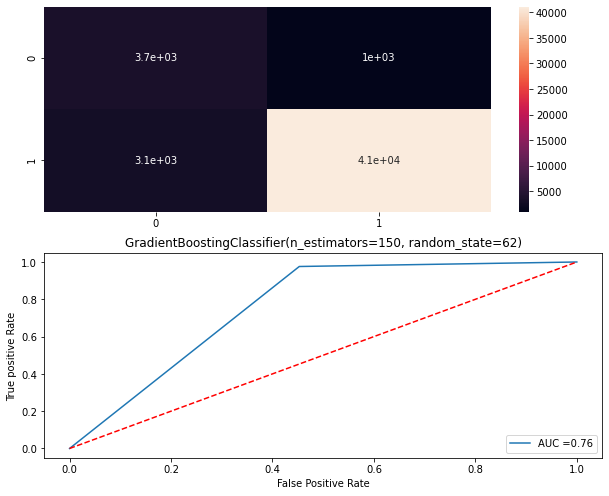

In [67]:
model=[]
score=[]
cvs=[]
rocscore=[]
F1score=[]
Precisionscore=[]
Recallscore=[]

for i in [LogisticRegression(penalty="l2" ,random_state= 60 ),
          KNeighborsClassifier(n_neighbors= 15 , algorithm = 'auto'  ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 78 , max_features = 'log2' ),
          RandomForestClassifier(criterion ="entropy" , max_features = 'log2' ,random_state= 56 ),
          GaussianNB( ),
          AdaBoostClassifier( learning_rate = 1, n_estimators = 200 ,random_state= 62) ,
          GradientBoostingClassifier (learning_rate=0.1, n_estimators = 150 , random_state= 62) ]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        F1=f1_score(predict,test_y)
        print("F1 Score= " ,F1)
        F1score.append(F1)
        print("")
        precision=precision_score(predict,test_y)
        print("Precision Score= " ,precision)
        Precisionscore.append(precision)
        print("")
        rec=recall_score(predict,test_y)
        print("Recall Score= " ,rec)
        Recallscore.append(rec)
        print("")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# From the above analysis w.r.t Accuracy score, Cross value score ana F1 score Random Forest Classifier is performing best¶

In [70]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_Score':F1score,'Precison_Score':Precisionscore,'Recall_Score':Recallscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve,F1_Score,Precison_Score,Recall_Score
0,LogisticRegression,0.864214,0.863482,0.520915,0.926655,0.995184,0.866956
1,KNeighborsClassifier,0.880572,0.880485,0.659863,0.933001,0.964773,0.903256
2,DecisionTreeClassifier,0.879815,0.875511,0.745793,0.930327,0.930945,0.929710
3,RandomForestClassifier,0.917355,0.916805,0.761600,0.953214,0.976776,0.930762
4,GaussianNB,0.649158,0.648381,0.730318,0.752320,0.618195,0.960773
5,AdaBoostClassifier,0.907888,0.907407,0.725205,0.948174,0.977583,0.920482
6,GradientBoostingClassifier,0.916660,0.915878,0.761508,0.952797,0.975851,0.930807


In [74]:
rfc=RandomForestClassifier(criterion ="entropy" , max_features = 'log2' ,random_state= 56 )
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)
F1=f1_score(predict,test_y)
print("F1 Score= " ,F1)
precision=precision_score(predict,test_y)
print("Precision Score= " ,precision)  
rec=recall_score(predict,test_y)
print("Recall Score= " ,rec)
                               

Accuracy Score = 0.9173550339412775
The CV Score = 0.9158784387025557
roc_auc_score 0.7615999973864723
F1 Score=  0.9532143435886752
Precision Score=  0.9767761831336733
Recall Score=  0.9307624494224553


# Saving Prediction

In [75]:
import joblib
joblib.dump(rfc,"Micro_Credit_Defaulter.pkl")

['Micro_Credit_Defaulter.pkl']

# Saving Prediction in CSV file

In [76]:
df2=pd.DataFrame(predict)
df2.to_csv("Micro_Credit_Defaulter-data.csv")